In [98]:
import pyspark
import pandas as pd
import pyspark.pandas as ps
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
latitude = 35.1443
longitude = -111.66637
location_url = f"https://api.weather.gov/points/{latitude},{longitude}"

In [78]:
requests.get(location_url).json()

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/35.1443,-111.6664',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-111.6664, 35.1443]},
 'properties': {'@id': 'https://api.weather.gov

In [80]:
forecast_url = flagstaff['properties']['forecast']
forecast_url

'https://api.weather.gov/gridpoints/FGZ/73,87/forecast'

In [83]:
forecast = requests.get(forecast_url).json()['properties']['periods']
df = pd.DataFrame(forecast).set_index('number')

df.head()

,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,probabilityOfPrecipitation,dewpoint,relativeHumidity,windSpeed,windDirection,icon,shortForecast,detailedForecast
number,,,,,,,,,,,,,,,
1,Today,2023-05-16T11:00:00-07:00,2023-05-16T18:00:00-07:00,True,72,F,falling,"{'unitCode': 'wmoUnit:percent', 'value': 60}","{'unitCode': 'wmoUnit:degC', 'value': 6.666666...","{'unitCode': 'wmoUnit:percent', 'value': 45}",6 to 9 mph,SW,"https://api.weather.gov/icons/land/day/tsra,60...",Showers And Thunderstorms Likely,"Showers and thunderstorms likely before 5pm, t..."
2,Tonight,2023-05-16T18:00:00-07:00,2023-05-17T06:00:00-07:00,False,42,F,rising,"{'unitCode': 'wmoUnit:percent', 'value': 30}","{'unitCode': 'wmoUnit:degC', 'value': 7.777777...","{'unitCode': 'wmoUnit:percent', 'value': 96}",1 to 7 mph,NE,"https://api.weather.gov/icons/land/night/tsra,...",Chance Showers And Thunderstorms,A chance of showers and thunderstorms. Mostly ...
3,Wednesday,2023-05-17T06:00:00-07:00,2023-05-17T18:00:00-07:00,True,70,F,falling,"{'unitCode': 'wmoUnit:percent', 'value': 70}","{'unitCode': 'wmoUnit:degC', 'value': 7.777777...","{'unitCode': 'wmoUnit:percent', 'value': 96}",2 to 8 mph,N,"https://api.weather.gov/icons/land/day/tsra,70...",Showers And Thunderstorms Likely,"A slight chance of rain showers before 11am, t..."
4,Wednesday Night,2023-05-17T18:00:00-07:00,2023-05-18T06:00:00-07:00,False,41,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 40}","{'unitCode': 'wmoUnit:degC', 'value': 8.333333...","{'unitCode': 'wmoUnit:percent', 'value': 100}",2 to 8 mph,NW,https://api.weather.gov/icons/land/night/tsra_...,Chance Showers And Thunderstorms,A chance of showers and thunderstorms. Mostly ...
5,Thursday,2023-05-18T06:00:00-07:00,2023-05-18T18:00:00-07:00,True,71,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 60}","{'unitCode': 'wmoUnit:degC', 'value': 6.666666...","{'unitCode': 'wmoUnit:percent', 'value': 89}",3 to 12 mph,W,https://api.weather.gov/icons/land/day/tsra_sc...,Showers And Thunderstorms Likely,"A slight chance of rain showers before 11am, t..."


In [94]:
temperatures = df.copy()[['name', 'temperature']]
temperatures['Celsius'] = round((df['temperature'] - 32) * 5/9).astype(int)
temperatures = temperatures.rename(columns={'temperature':'Fahrenheit', 'name': 'Time'}).set_index('Time')
temperatures.head()

,Fahrenheit,Celsius
Time,,
Today,72,22
Tonight,42,6
Wednesday,70,21
Wednesday Night,41,5
Thursday,71,22


In [97]:
df['startTime'] = pd.to_datetime(df['startTime'])
df.head()

,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,probabilityOfPrecipitation,dewpoint,relativeHumidity,windSpeed,windDirection,icon,shortForecast,detailedForecast
number,,,,,,,,,,,,,,,
1,Today,2023-05-16 11:00:00-07:00,2023-05-16T18:00:00-07:00,True,72,F,falling,"{'unitCode': 'wmoUnit:percent', 'value': 60}","{'unitCode': 'wmoUnit:degC', 'value': 6.666666...","{'unitCode': 'wmoUnit:percent', 'value': 45}",6 to 9 mph,SW,"https://api.weather.gov/icons/land/day/tsra,60...",Showers And Thunderstorms Likely,"Showers and thunderstorms likely before 5pm, t..."
2,Tonight,2023-05-16 18:00:00-07:00,2023-05-17T06:00:00-07:00,False,42,F,rising,"{'unitCode': 'wmoUnit:percent', 'value': 30}","{'unitCode': 'wmoUnit:degC', 'value': 7.777777...","{'unitCode': 'wmoUnit:percent', 'value': 96}",1 to 7 mph,NE,"https://api.weather.gov/icons/land/night/tsra,...",Chance Showers And Thunderstorms,A chance of showers and thunderstorms. Mostly ...
3,Wednesday,2023-05-17 06:00:00-07:00,2023-05-17T18:00:00-07:00,True,70,F,falling,"{'unitCode': 'wmoUnit:percent', 'value': 70}","{'unitCode': 'wmoUnit:degC', 'value': 7.777777...","{'unitCode': 'wmoUnit:percent', 'value': 96}",2 to 8 mph,N,"https://api.weather.gov/icons/land/day/tsra,70...",Showers And Thunderstorms Likely,"A slight chance of rain showers before 11am, t..."
4,Wednesday Night,2023-05-17 18:00:00-07:00,2023-05-18T06:00:00-07:00,False,41,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 40}","{'unitCode': 'wmoUnit:degC', 'value': 8.333333...","{'unitCode': 'wmoUnit:percent', 'value': 100}",2 to 8 mph,NW,https://api.weather.gov/icons/land/night/tsra_...,Chance Showers And Thunderstorms,A chance of showers and thunderstorms. Mostly ...
5,Thursday,2023-05-18 06:00:00-07:00,2023-05-18T18:00:00-07:00,True,71,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 60}","{'unitCode': 'wmoUnit:degC', 'value': 6.666666...","{'unitCode': 'wmoUnit:percent', 'value': 89}",3 to 12 mph,W,https://api.weather.gov/icons/land/day/tsra_sc...,Showers And Thunderstorms Likely,"A slight chance of rain showers before 11am, t..."


In [119]:
day = df.copy().loc[df['isDaytime'] == 'True']
night = df.copy().loc[df['isDaytime'] == 'False']

day.head()

,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,probabilityOfPrecipitation,dewpoint,relativeHumidity,windSpeed,windDirection,icon,shortForecast,detailedForecast
number,,,,,,,,,,,,,,,


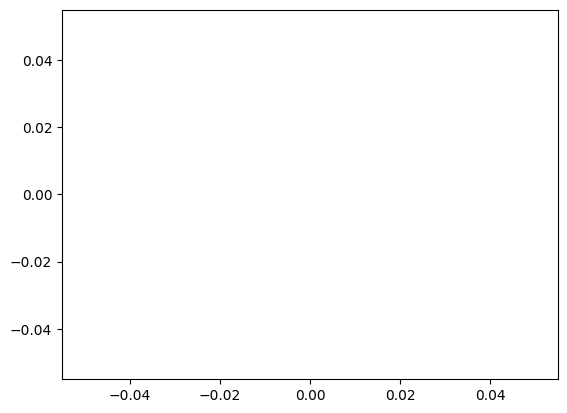

In [120]:
plt.plot(day['temperature'])
plt.plot(night['temperature'])
plt.show()